In [1]:
import os
#move up in directory
os.chdir('../')
#os.getcwd()

In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather
from sklearn.metrics import mean_squared_error

from helpers import dot2_

In [3]:
fit_path = 'data/intermediate_data/modeling/modeling_fits/'
feather_file_name = 'stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_9_test_sd_0_28.feather'
df = feather.read_feather(fit_path + feather_file_name)
df

FileNotFoundError: [WinError 2] Failed to open local file 'data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_9_test_sd_0_28.feather'. Detail: [Windows error 2] Das System kann die angegebene Datei nicht finden.


In [5]:
# FIT_PATH = 'data/intermediate_data/modeling/modeling_fits/'
NUM_IDS = 9
NUM_RUNS = 10
TEST_SDS = np.arange(0.04, 0.32, 0.02)
TRAIN_SDS = ['meta_volatility', '.1', '.05']

In [6]:
# load the model fits

# feather_file_name = 'stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_1.feather'
# df = feather.read_feather(FIT_PATH + feather_file_name)
# train_sd = 'meta'
# test_sd = '0_1'
# id_ = 0

In [7]:





# final_df['alpha'] = np.mean(df[alpha_cols])
# final_df['beta'] = np.mean(df[beta_cols])
# final_df['train_sd'] = train_sd
# final_df['test_sd'] = test_sd
# final_df['id'] = id_

# final_df

In [8]:
# collect mean parameter values as lists
# final_df = pd.DataFrame(columns=['alpha','beta','train_sd','test_sd', 'id'])
# alpha_cols = ['alpha[{}]'.format(i) for i in range(1, 11)]
# beta_cols = ['beta[{}]'.format(i) for i in range(1, 11)]
# alpha_mean_list = []
# beta_mean_list = []

# alpha_mean_list.append(np.mean(df[alpha_cols]))
# beta_mean_list.append(np.mean(df[beta_cols]))

# # insert in df

# final_df['alpha'] = np.array(alpha_mean_list).flatten()
# final_df['beta'] = np.array(beta_mean_list).flatten()
# final_df['train_sd'] = train_sd
# final_df['test_sd'] = test_sd
# final_df['id'] = id_



# # return df
# final_df

In [6]:
# def get_mean_parameters_by_id_sd(train_sds, test_sd_range, num_ids, reward_type
#                                  , file_substring = 'stan_fit_m_2_d_rnn_n_f_rt_{}_train_sd_{}_id_{}_test_sd_{}.feather'
#                                  , fit_path = 'data/intermediate_data/modeling/modeling_fits/'
#                                  , num_runs = 10):   

#     # prepare objects
#     final_df = pd.DataFrame(columns=['alpha','beta','train_sd','test_sd', 'id'])
#     alpha_cols = ['alpha[{}]'.format(i) for i in range(1, num_runs + 1)]
#     beta_cols = ['beta[{}]'.format(i) for i in range(1, num_runs + 1)]
#     alpha_mean_list = []
#     beta_mean_list = []
#     id_list = []
#     test_sd_list = []
#     train_sd_list = []

#     for train_sd in train_sds:
#         for id_ in range(num_ids):
#                 for sd in test_sd_range:

#                     test_sd = dot2_(sd)
                    
#                     # load feather file with fits
#                     feather_file_name = file_substring.format(reward_type, train_sd, id_, test_sd)
#                     df = feather.read_feather(fit_path + feather_file_name)
#                     print(fit_path + feather_file_name)
                    
#                     # fill lists
#                     alpha_mean_list.append(np.mean(df[alpha_cols]))
#                     beta_mean_list.append(np.mean(df[beta_cols]))
#                     train_sd_list.append([train_sd] * num_runs)
#                     test_sd_list.append([test_sd] * num_runs)
#                     id_list.append([id_] *num_runs)
    
#     # fill df
# #     pdb.set_trace()
    
#     final_df['alpha'] = np.array(alpha_mean_list).flatten()
#     final_df['beta'] = np.array(beta_mean_list).flatten()
#     final_df['train_sd'] = np.array(train_sd_list).flatten()
#     final_df['test_sd'] = np.array(test_sd_list).flatten()
#     final_df['id'] = np.array(id_list).flatten()
                
#     return(final_df)

def get_median_parameters_by_id_sd(train_sds, test_sd_range, num_ids, reward_type
                                 , file_substring = 'stan_fit_m_2_d_rnn_n_f_rt_{}_train_sd_{}_id_{}_test_sd_{}.feather'
                                 , fit_path = 'data/intermediate_data/modeling/modeling_fits/'
                                 , num_runs = 10):   

    # prepare objects
    final_df = pd.DataFrame(columns=['alpha','beta','train_sd','test_sd', 'id'])
    alpha_cols = ['alpha[{}]'.format(i) for i in range(1, num_runs + 1)]
    beta_cols = ['beta[{}]'.format(i) for i in range(1, num_runs + 1)]
    alpha_median_list = []
    beta_median_list = []
    id_list = []
    test_sd_list = []
    train_sd_list = []

    for train_sd in train_sds:
        for id_ in range(num_ids):
                for sd in test_sd_range:

                    test_sd = dot2_(sd)
                    
                    # load feather file with fits
                    feather_file_name = file_substring.format(reward_type, train_sd, id_, test_sd)
                    df = feather.read_feather(fit_path + feather_file_name)
                    print(fit_path + feather_file_name)
                    
                    # fill lists
                    alpha_median_list.append(np.median(df[alpha_cols], axis = 0))
                    beta_median_list.append(np.median(df[beta_cols], axis = 0))
                    train_sd_list.append([train_sd] * num_runs)
                    test_sd_list.append([test_sd] * num_runs)
                    id_list.append([id_] *num_runs)
    
    # fill df
#     pdb.set_trace()
    
    final_df['alpha'] = np.array(alpha_median_list).flatten()
    final_df['beta'] = np.array(beta_median_list).flatten()
    final_df['train_sd'] = np.array(train_sd_list).flatten()
    final_df['test_sd'] = np.array(test_sd_list).flatten()
    final_df['id'] = np.array(id_list).flatten()
                
    return(final_df)

In [7]:
df = get_median_parameters_by_id_sd(train_sds = TRAIN_SDS, num_ids=NUM_IDS, num_runs= NUM_RUNS, reward_type='continuous', test_sd_range = TEST_SDS)

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_06.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_08.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_1.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_12.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_14.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_16.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rn

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_14.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_16.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_18.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_2.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_22.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_24.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rn

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_8_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_8_test_sd_0_3.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_meta_volatility_id_8_test_sd_0_32.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_0_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_0_test_sd_0_06.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_0_test_sd_0_08.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_0_test_sd_0_1.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_0_test_sd_0_12.fea

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_22.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_24.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_3.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_4_test_sd_0_32.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_5_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.1_id_5_test_sd_0_06.feather
data/intermediate_data/modeling/m

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_0_test_sd_0_24.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_0_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_0_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_0_test_sd_0_3.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_0_test_sd_0_32.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_1_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_1_test_sd_0_06.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_1_test_sd_0_08.feather
data/intermediate_data/mo

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_16.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_18.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_2.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_22.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_24.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_rnn_n_f_rt_continuous_train_sd_.05_id_5_test_sd_0_3.feather
data/intermediate_data/mod

In [8]:
# add ac

NUM_IDS_AC = 9
TRAIN_SDS_AC = ['meta_volatility']
TEST_SDS_AC = np.arange(0.04, 0.32, 0.02)


df_ac = get_median_parameters_by_id_sd(train_sds = TRAIN_SDS_AC, num_ids=NUM_IDS_AC, num_runs= NUM_RUNS, reward_type='continuous'
                                       , test_sd_range = TEST_SDS_AC, file_substring = 'stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_{}_train_sd_{}_id_{}_test_sd_{}.feather')


data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_06.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_08.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_1.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_12.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_0_test_sd_0_14.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_3_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_3_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_3_test_sd_0_3.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_3_test_sd_0_32.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_04.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_4_test_sd_0_06.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_

data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_18.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_2.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_22.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_24.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_26.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_meta_volatility_id_7_test_sd_0_28.feather
data/intermediate_data/modeling/modeling_fits/stan_fit_m_2_d_lstm_ac_continuous_n_f_rt_continuous_train_sd_

In [46]:
###########################
# deleting outliers aac   #
###########################

# df_new_ac = df_ac[df_ac.beta < 175]
# df_new_ac = df_new_ac[df_new_ac.beta > 0]


# rename train_sd
df_ac['train_sd'] = 'LSTM + A2C: Meta-Volatility'
df_ac



,alpha,beta,train_sd,test_sd,id
0,0.098825,29.744034,LSTM + A2C: Meta-Volatility,0_04,0
1,0.139963,17.726499,LSTM + A2C: Meta-Volatility,0_04,0
2,0.235367,7.215787,LSTM + A2C: Meta-Volatility,0_04,0
3,0.109334,15.965729,LSTM + A2C: Meta-Volatility,0_04,0
4,0.160332,12.882129,LSTM + A2C: Meta-Volatility,0_04,0
...,...,...,...,...,...
1345,0.297323,9.097788,LSTM + A2C: Meta-Volatility,0_32,8
1346,0.350865,6.879451,LSTM + A2C: Meta-Volatility,0_32,8
1347,0.255638,8.995061,LSTM + A2C: Meta-Volatility,0_32,8
1348,0.316299,8.497587,LSTM + A2C: Meta-Volatility,0_32,8


In [47]:
#######################
# deleting outliers   #
#######################
# df_new = df[df.beta < 175]
# df_new = df_new[df_new.beta > 0]

df_new = df

In [48]:
# merge aac and rnn
df_new = pd.concat([df_new, df_ac])
df_new

,alpha,beta,train_sd,test_sd,id
0,0.132448,22.659676,meta_volatility,0_04,0
1,0.138486,17.812031,meta_volatility,0_04,0
2,0.240765,7.141333,meta_volatility,0_04,0
3,0.107203,15.771377,meta_volatility,0_04,0
4,0.157981,12.857809,meta_volatility,0_04,0
...,...,...,...,...,...
1345,0.297323,9.097788,LSTM + A2C: Meta-Volatility,0_32,8
1346,0.350865,6.879451,LSTM + A2C: Meta-Volatility,0_32,8
1347,0.255638,8.995061,LSTM + A2C: Meta-Volatility,0_32,8
1348,0.316299,8.497587,LSTM + A2C: Meta-Volatility,0_32,8


In [49]:
# take median of alpha, beta over test_sd & id
df_new = df_new.groupby(['test_sd', 'id', 'train_sd']).median().reset_index()

df_new.loc[df_new['train_sd']=='.05', 'train_sd'] = 'RNN: Low Volatility'
df_new.loc[df_new['train_sd']=='.1', 'train_sd'] = 'RNN: Medium Volatility'
df_new.loc[df_new['train_sd']=='meta_volatility', 'train_sd'] = 'RNN: Meta-Volatility'


# ['RNN: Low Volatility'
#                                                    , 'RNN: Medium Volatility'
#                                                    ,'RNN: Meta-Volatility'
#                                                   , 'LSTM + A2C: Meta-Volatility']

#df.loc[df['A'] > 2, 'B'] = new_val



In [50]:
df_new

,test_sd,id,train_sd,alpha,beta
0,0_04,0,RNN: Low Volatility,0.147815,21.012266
1,0_04,0,RNN: Medium Volatility,0.368849,11.337181
2,0_04,0,LSTM + A2C: Meta-Volatility,0.150147,19.295950
3,0_04,0,RNN: Meta-Volatility,0.148233,19.376147
4,0_04,1,RNN: Low Volatility,0.117853,19.281042
...,...,...,...,...,...
535,0_32,7,RNN: Meta-Volatility,0.420378,6.244355
536,0_32,8,RNN: Low Volatility,0.200591,11.426072
537,0_32,8,RNN: Medium Volatility,0.283916,7.386959
538,0_32,8,LSTM + A2C: Meta-Volatility,0.309872,8.746324


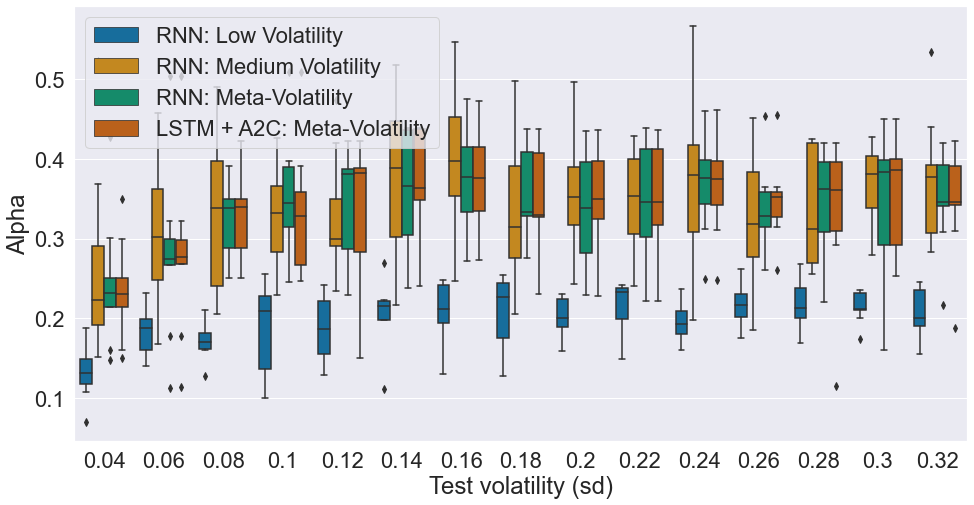

In [51]:
# plotting

# plot boxplot
plt.figure(figsize=(16, 8))

sns.set(font_scale=2)

box = sns.boxplot(x = 'test_sd', y = 'alpha', hue = 'train_sd', data=df_new, 
                 palette="colorblind", hue_order= ['RNN: Low Volatility'
                                                   , 'RNN: Medium Volatility'
                                                   ,'RNN: Meta-Volatility'
                                                  , 'LSTM + A2C: Meta-Volatility'])

# box.axhline(1/4, ls = '--', c = 'black')

legend = box.legend()

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Alpha')

# box.set_title('continuous restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks)            

plt.show()

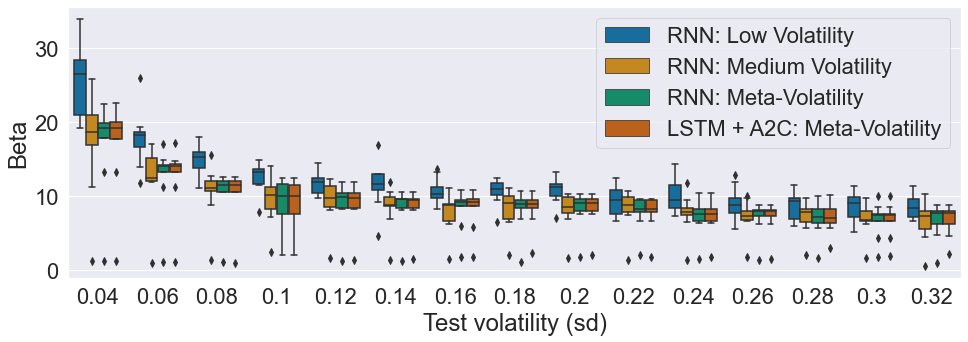

In [53]:
# plotting

# plot boxplot
plt.figure(figsize=(16, 5))

box = sns.boxplot(x = 'test_sd', y = 'beta', hue = 'train_sd', data=df_new, 
                 palette="colorblind", hue_order= ['RNN: Low Volatility'
                                                   , 'RNN: Medium Volatility'
                                                   ,'RNN: Meta-Volatility'
                                                  , 'LSTM + A2C: Meta-Volatility'])

box.set(
    xlabel='Test volatility (sd)', 
    ylabel='Beta')

legend = box.legend()

# box.set_title('continuous restless bandits')

x_ticks = []
for i in TEST_SDS: x_ticks.append(str(round(i, 2)))
box.set_xticklabels(x_ticks)          

plt.show()

# Curve Fitting

In [90]:
from scipy.optimize import curve_fit

In [91]:
df_new_medians = df_new.groupby(['test_sd', 'train_sd']).median().reset_index()

In [92]:
# fit power functions
# input: x, y
# output: estimated parameters

# Function to calculate the power-law with constants a and b
def power_law(x, a, b):
    return a*np.power(x, b)

def fit_pwr_fct(x,y):
    return(curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf)))





.05
[0.26112279 0.14290233]
.1
[0.43371027 0.13511547]
meta_volatility
[0.43617735 0.132     ]
aac_meta_vol.
[0.44714455 0.14410011]


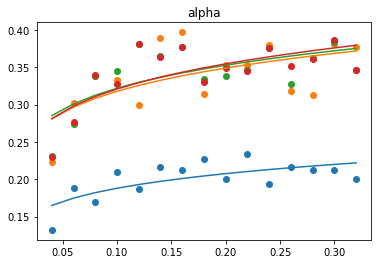

In [93]:
for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # fit power function
    pars, _ = fit_pwr_fct(x,y)
    
    print(i)
    print(pars)
    
    # plot
    plt.scatter(x,y)
    plt.plot(x, power_law(x, *pars), '-')
    plt.title('alpha')

.05
[ 4.08225714 -0.55513795]
.1
[ 4.06589541 -0.43801447]
meta_volatility
[ 4.00060929 -0.46023529]
aac_meta_vol.
[ 3.98569321 -0.46142186]


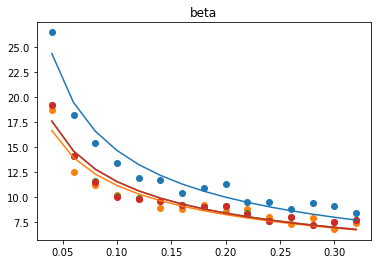

In [94]:
for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # fit power function
    pars, _ = fit_pwr_fct(x,y)
    
    print(i)
    print(pars)
    
    # plot
    plt.scatter(x,y)
    plt.plot(x, power_law(x, *pars), '-')
    plt.title('beta')

# Curve Fitting

In [95]:
# functions to fit

# power-law
def power_law(x, a, b):
    return a*np.power(x, b)

# exponential function
def exp_fct(x, a, b):
    return a*np.power(b,x)

# linear quadratic function
def lin_q_fct(x, b0, b1, b2):
    return b0 + b1*x + b2 * np.power(x,2)

# linear quadratic + inverse function
def lin_q_inv_fct(x, b0, b1, b2):
    return b0 + b1*(1/x) + b2 * np.power(1/x,2)

# linear qubic function
def lin_qubic_fct(x, b0, b1, b2, b3):
    return b0 + b1*x + b2 * np.power(x,2) + b3 * np.power(x,3)

# one-phase associative function
def opa_fct(x, y0, y_max, k):
    return y0 + (y_max-y0)*(1-np.exp(-k*x))

In [96]:
# exponential function

def exp_fct(x, a, b):
    return a*np.power(b,x)

def fit_fct(x,y, fct):
    return(curve_fit(f=fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf)))

# fit power function
exp_pars, _ = fit_fct(x,y, fct = exp_fct)

# calculate RMSE

y_observed = x
y_predicted = exp_fct(x, *exp_pars)

mean_squared_error(y_observed, y_predicted, squared=False)

10.04949223546955

In [97]:
for i in ['.05', '.1', 'meta_volatility']:
    
    print('Train_SD: {}'.format(i))

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha
    
    y_observed = x
    
    # power function
    alpha_power_pars, _ = curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_power = power_law(x, *alpha_power_pars)
    
    rmse_alpha_power = mean_squared_error(y_observed, y_predicted_alpha_power, squared=False)
    
    print('alpha_power :{}'.format(rmse_alpha_power))
    
    # exponential function
    alpha_exp_pars, _ = curve_fit(f=exp_fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf))
    
    y_predicted_alpha_exp = exp_fct(x, *alpha_exp_pars)
    
    rmse_alpha_exp = mean_squared_error(y_observed, y_predicted_alpha_exp, squared=False)
    
    print('alpha_exp :{}'.format(rmse_alpha_exp))
    
    # linear quadratic function
    alpha_lin_q_pars, _ = curve_fit(f=lin_q_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_q = lin_q_fct(x, *alpha_lin_q_pars)
    
    rmse_alpha_lin_q = mean_squared_error(y_observed, y_predicted_alpha_lin_q, squared=False)
    
    print('alpha_lin_q :{}'.format(rmse_alpha_lin_q))
        
    # linear quadratic + inverse function
    alpha_lin_q_inv_pars, _ = curve_fit(f=lin_q_inv_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_q_inv = lin_q_inv_fct(x, *alpha_lin_q_inv_pars)
    
    rmse_alpha_lin_q_inv = mean_squared_error(y_observed, y_predicted_alpha_lin_q_inv, squared=False)
    
    print('alpha_lin_q_inv :{}'.format(rmse_alpha_lin_q_inv))
    
    # linear qubic function
    alpha_lin_qub_pars, _ = curve_fit(f=lin_qubic_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_qub = lin_qubic_fct(x, * alpha_lin_qub_pars)
    
    rmse_alpha_lin_qub = mean_squared_error(y_observed, y_predicted_alpha_lin_qub, squared=False)
    
    print('alpha_lin_qub :{}'.format(rmse_alpha_lin_qub))
    
    # one-phase associative function
    alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
    rmse_alpha_opa = mean_squared_error(y_observed, y_predicted_alpha_opa, squared=False)
    
    print('alpha_opa :{}'.format(rmse_alpha_opa))
    
    
    

Train_SD: .05
alpha_power :0.07326819888088033
alpha_exp :0.07602367911378684
alpha_lin_q :0.07649898971796434
alpha_lin_q_inv :0.07579157440170045
alpha_lin_qub :0.07664718114251384
alpha_opa :0.07574304618724226
Train_SD: .1
alpha_power :0.1693943592586806
alpha_exp :0.1707173367946935
alpha_lin_q :0.17113692518084525
alpha_lin_q_inv :0.17223489133551326
alpha_lin_qub :0.17221928068692718
alpha_opa :0.1726480641894451
Train_SD: meta_volatility
alpha_power :0.17310151122573192
alpha_exp :0.1747520272578012
alpha_lin_q :0.175503467915382
alpha_lin_q_inv :0.1758538894135535
alpha_lin_qub :0.17648306361104601
alpha_opa :0.17559360039431007


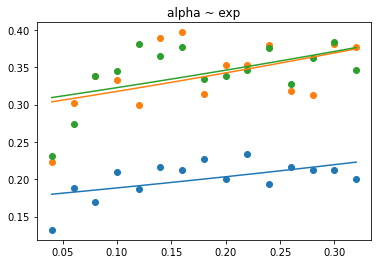

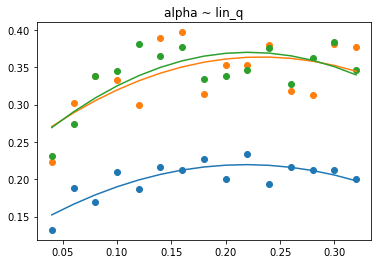

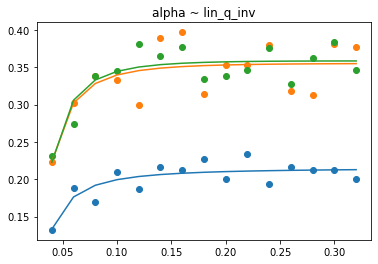

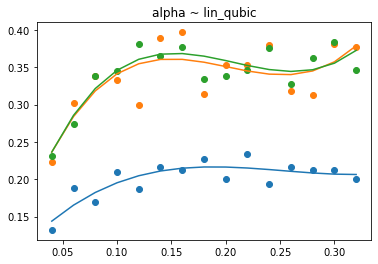

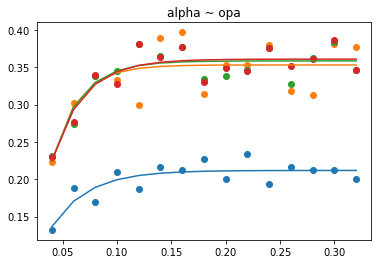

In [98]:
# plot

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # exponential function
    alpha_exp_pars, _ = curve_fit(f=exp_fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf))
    
    y_predicted_alpha_exp = exp_fct(x, *alpha_exp_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_exp , '-')
    plt.title('alpha ~ exp')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # quadratic function
    alpha_lin_q_pars, _ = curve_fit(f=lin_q_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_q = lin_q_fct(x, *alpha_lin_q_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_lin_q , '-')
    plt.title('alpha ~ lin_q')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # linear quadratic + inverse function
    alpha_lin_q_inv_pars, _ = curve_fit(f=lin_q_inv_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_q_inv = lin_q_inv_fct(x, *alpha_lin_q_inv_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_lin_q_inv , '-')
    plt.title('alpha ~ lin_q_inv')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # linear qubic function
    alpha_lin_qub_pars, _ = curve_fit(f=lin_qubic_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_lin_qub = lin_qubic_fct(x, * alpha_lin_qub_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_lin_qub, '-')
    plt.title('alpha ~ lin_qubic')    

plt.show()

for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].alpha

    # one-phase associative function
    alpha_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_alpha_opa = opa_fct(x, *alpha_opa_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_alpha_opa, '-')
    plt.title('alpha ~ opa')    

plt.show()

In [99]:
# HIER INTERPRETATION Y0 = Y_intercept, Y_Max = Asymptote as x -> inf, k = is the rate constant (?)
alpha_opa_pars

array([-0.18685112,  0.36089368, 34.84589478])

In [100]:
for i in ['.05', '.1', 'meta_volatility']:
    
    print('Train_SD: {}'.format(i))

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta
    
    y_observed = x
    
    # power function
    beta_power_pars, _ = curve_fit(f=power_law, xdata=x, ydata=y, p0=[0, 0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_power = power_law(x, *beta_power_pars)
    
    rmse_beta_power = mean_squared_error(y_observed, y_predicted_beta_power, squared=False)
    
    print('beta_power :{}'.format(rmse_beta_power))
    
    # exponential function
    beta_exp_pars, _ = curve_fit(f=exp_fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf))
    
    y_predicted_beta_exp = exp_fct(x, *beta_exp_pars)
    
    rmse_beta_exp = mean_squared_error(y_observed, y_predicted_beta_exp, squared=False)
    
    print('beta_exp :{}'.format(rmse_beta_exp))
    
    # linear quadratic function
    beta_lin_q_pars, _ = curve_fit(f=lin_q_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_q = lin_q_fct(x, *beta_lin_q_pars)
    
    rmse_beta_lin_q = mean_squared_error(y_observed, y_predicted_beta_lin_q, squared=False)
    
    print('beta_lin_q :{}'.format(rmse_beta_lin_q))
        
    # linear quadratic + inverse function
    beta_lin_q_inv_pars, _ = curve_fit(f=lin_q_inv_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_q_inv = lin_q_inv_fct(x, *beta_lin_q_inv_pars)
    
    rmse_beta_lin_q_inv = mean_squared_error(y_observed, y_predicted_beta_lin_q_inv, squared=False)
    
    print('beta_lin_q_inv :{}'.format(rmse_beta_lin_q_inv))
    
    # linear qubic function
    beta_lin_qub_pars, _ = curve_fit(f=lin_qubic_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_qub = lin_qubic_fct(x, * beta_lin_qub_pars)
    
    rmse_beta_lin_qub = mean_squared_error(y_observed, y_predicted_beta_lin_qub, squared=False)
    
    print('beta_lin_qub :{}'.format(rmse_beta_lin_qub))
    
    # one-phase associative function
    beta_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.1, 0.1, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_opa = opa_fct(x, *beta_opa_pars)
    
    rmse_beta_opa = mean_squared_error(y_observed, y_predicted_beta_opa, squared=False)
    
    print('beta_opa :{}'.format(rmse_beta_opa))

Train_SD: .05
beta_power :12.927160328680095
beta_exp :12.774983068813102
beta_lin_q :12.856505577994024
beta_lin_q_inv :12.959156633114185
beta_lin_qub :12.929426060344538
beta_opa :12.946069895410803
Train_SD: .1
beta_power :9.804551064242935
beta_exp :9.726458545298364
beta_lin_q :9.763893442267676
beta_lin_q_inv :9.829812681117502
beta_lin_qub :9.806351215767185
beta_opa :9.816534008502776
Train_SD: meta_volatility
beta_power :10.147664332570557
beta_exp :10.060985593370795
beta_lin_q :10.110592042922681
beta_lin_q_inv :10.1690496127971
beta_lin_qub :10.14676673936677
beta_opa :10.159938470809987


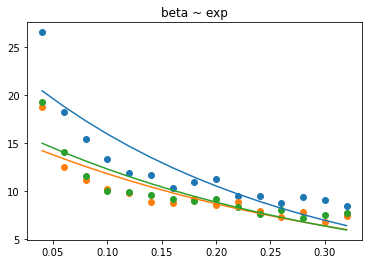

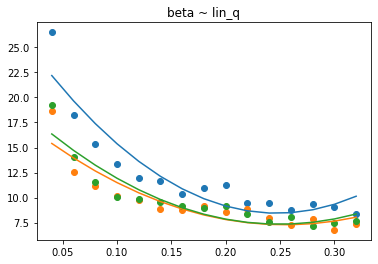

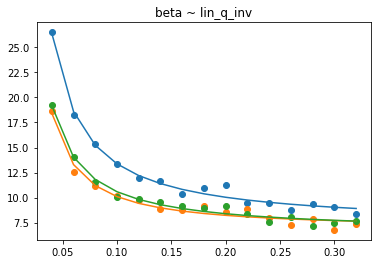

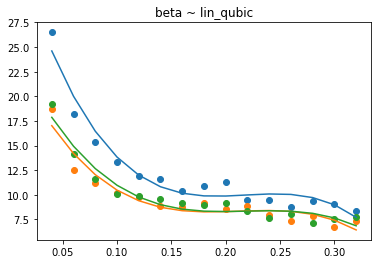

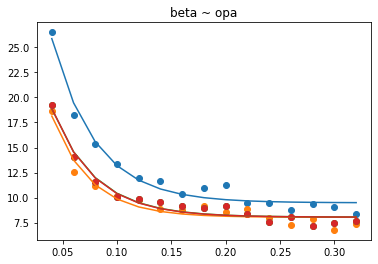

In [101]:
# plot

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # exponential function
    beta_exp_pars, _ = curve_fit(f=exp_fct, xdata=x, ydata=y, p0=[0.01, 0.01], bounds=(0, np.inf))
    
    y_predicted_beta_exp = exp_fct(x, *beta_exp_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_beta_exp , '-')
    plt.title('beta ~ exp')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # quadratic function
    beta_lin_q_pars, _ = curve_fit(f=lin_q_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_q = lin_q_fct(x, *beta_lin_q_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_beta_lin_q , '-')
    plt.title('beta ~ lin_q')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # linear quadratic + inverse function
    beta_lin_q_inv_pars, _ = curve_fit(f=lin_q_inv_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_q_inv = lin_q_inv_fct(x, *beta_lin_q_inv_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_beta_lin_q_inv , '-')
    plt.title('beta ~ lin_q_inv')    

plt.show()

for i in ['.05', '.1', 'meta_volatility']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # linear qubic function
    beta_lin_qub_pars, _ = curve_fit(f=lin_qubic_fct, xdata=x, ydata=y, p0=[0.0, 0.0, 0.0, 0.0], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_lin_qub = lin_qubic_fct(x, * beta_lin_qub_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_beta_lin_qub, '-')
    plt.title('beta ~ lin_qubic')    

plt.show()

for i in ['.05', '.1', 'meta_volatility', 'aac_meta_vol.']:

    x = np.arange(0.04, 0.32, 0.02)
    y = df_new_medians[df_new_medians.train_sd == i].beta

    # one-phase associative function
    beta_opa_pars, _ = curve_fit(f=opa_fct, xdata=x, ydata=y, p0=[0.1, 0.1, 0.1], bounds=(-np.inf, np.inf))
    
    y_predicted_beta_opa = opa_fct(x, *beta_opa_pars)
    
    plt.scatter(x,y)
    plt.plot(x,  y_predicted_beta_opa, '-')
    plt.title('beta ~ opa')    

plt.show()

# Bayesian Curve-Fitting

In [103]:
# export median values

feather.write_feather(df_new_medians, fit_path + '/' + 'modeling_test.feather')